<a href="https://colab.research.google.com/github/RoshinRG/Fundametals-of-machine-learning/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

[4512 3738 4261 3777 4177] [1530 1297 1335 1282 1590]
Mean: 3633.9915611814345 1282.873417721519
Slope (m): 0.2634293394893993 Intercept (c): 325.5734210494428


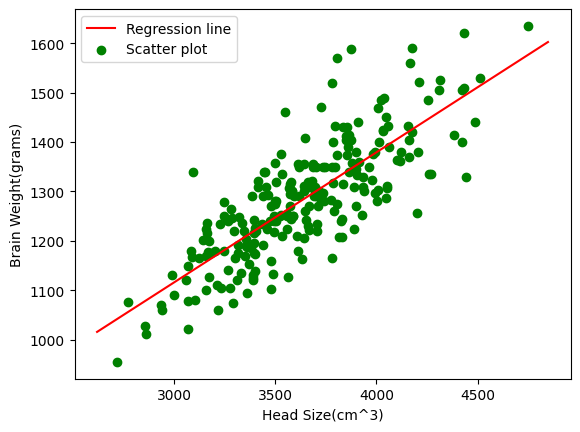

Custom R² Score: 0.639311719957
Sklearn R² Score: 0.639311719957


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('headbrain.csv')
x = np.array(data['Head Size(cm^3)'])
y = np.array(data['Brain Weight(grams)'])
print(x[:5], y[:5])

def get_line(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    print("Mean:", x_m, y_m)
    x_d, y_d = x - x_m, y - y_m
    m = np.sum(x_d * y_d) / np.sum(x_d ** 2)
    c = y_m - (m * x_m)
    print("Slope (m):", m, "Intercept (c):", c)
    return lambda val: m * val + c

lin = get_line(x, y)
X = np.linspace(np.min(x) - 100, np.max(x) + 100, 1000)
Y = np.array([lin(val) for val in X])
plt.plot(X, Y, color='red', label='Regression line')
plt.scatter(x, y, color='green', label='Scatter plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

def get_error(line_func, x, y):
    y_m = np.mean(y)
    y_pred = np.array([line_func(val) for val in x])
    ss_t = np.sum((y - y_m) ** 2)
    ss_r = np.sum((y - y_pred) ** 2)
    return 1 - (ss_r / ss_t)

print("Custom R² Score:", get_error(lin, x, y))

x = x.reshape((len(x), 1))
reg = LinearRegression().fit(x, y)
print("Sklearn R² Score:", reg.score(x, y))


# New Section

In [12]:
!pip install scikit-learn pandas numpy --quiet

import pandas as pd
import numpy as np
from numpy import log, dot, exp, shape
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os

if not os.path.exists("suv_data.csv"):
    from google.colab import files
    print("Please upload your 'suv_data.csv' file:")
    uploaded = files.upload()

data = pd.read_csv("suv_data.csv")
print(data.head())

x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print("Standardized Training Data (first 10 rows):\n", x_train[:10, :])

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print("Predictions (in-built):", y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy (in-built):", accuracy_score(y_test, y_pred))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:, i] = (X_tr[:, i] - np.mean(X_tr[:, i])) / np.std(X_tr[:, i])
    return X_tr

standardize(x_train)
standardize(x_test)

def F1_score(y, y_hat):
    tp = tn = fp = fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    f1_score = 2 * precision * recall / (precision + recall + 1e-10)
    return f1_score

class LogisticRegressionManual:
    def sigmoid(self, z):
        return 1 / (1 + exp(-z))

    def initialize(self, X):
        weights = np.zeros((shape(X)[1] + 1, 1))
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        def cost(theta):
            z = dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(log(1 - self.sigmoid(z)))
            cost = -((cost1 + cost0)) / len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list

    def predict(self, X):
        _, X = self.initialize(X)
        z = dot(X, self.weights)
        lis = []
        for i in self.sigmoid(z):
            lis.append(1 if i > 0.5 else 0)
        return np.array(lis)

obj1 = LogisticRegressionManual()
obj1.fit(x_train, y_train)
y_pred = obj1.predict(x_test)
y_train_pred = obj1.predict(x_train)

f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_pred)

print("F1 Score (Train):", f1_score_train)
print("F1 Score (Test):", f1_score_test)

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / np.sum(conf_mat)
print("Confusion Matrix (Custom):\n", conf_mat)
print("Accuracy (Custom):", accuracy)


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Standardized Training Data (first 10 rows):
 [[-1.05714987  0.53420426]
 [ 0.2798728  -0.51764734]
 [-1.05714987  0.41733186]
 [-0.29313691 -1.45262654]
 [ 0.47087604  1.23543867]
 [-1.05714987 -0.34233874]
 [-0.10213368  0.30045946]
 [ 1.33039061  0.59264046]
 [-1.15265148 -1.16044554]
 [ 1.04388575  0.47576806]]
Predictions (in-built): [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1]
Confusion Matrix:
 [[31  1]
 [ 1  7]]
Accuracy (in-built): 0.95
F1 Score (Train): 0.7583333332834827
F1 Score (Test): 0.8235294117051903
Confusion Matrix (Custom):
 [[30  2]
 [ 1  7]]
Accuracy (Custom): 0.925


/tmp/ipython-input-2791434976.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


In [16]:
import numpy as np
import pandas as pd

input_value = np.array([[0, 0],
                        [0, 1],
                        [1, 1],
                        [1, 0]])

output = np.array([0, 0, 1, 0]).reshape(4, 1)

np.random.seed(0)
weights = np.array([[0.1], [0.3]])
bias = 0.2
lr = 0.05
epochs = 15000
n = input_value.shape[0]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for epoch in range(epochs):
    weighted_sum = np.dot(input_value, weights) + bias
    y_pred = sigmoid(weighted_sum)
    error = y_pred - output
    loss = np.mean(error**2)
    dsig = y_pred * (1 - y_pred)
    delta = error * dsig
    grad_w = np.dot(input_value.T, delta) / n
    grad_b = np.sum(delta) / n
    weights -= lr * grad_w
    bias -= lr * grad_b
    if (epoch + 1) % 3000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.6f}")

print("\nTrained weights:\n", weights.ravel())
print("Trained bias:\n", bias)

def predict(x):
    x = np.array(x)
    z = np.dot(x, weights) + bias
    return sigmoid(z)

tests = [np.array([1, 0]), np.array([1, 1]), np.array([0, 0]), np.array([0, 1])]
for t in tests:
    p = predict(t)
    print(f"Input {t.tolist()} -> output (prob) = {float(p):.8f}, class = {int(p > 0.5)}")


Epoch 3000, Loss: 0.072286
Epoch 6000, Loss: 0.042138
Epoch 9000, Loss: 0.028816
Epoch 12000, Loss: 0.021495
Epoch 15000, Loss: 0.016957

Trained weights:
 [3.40782569 3.40785266]
Trained bias:
 -5.221882179646806
Input [1, 0] -> output (prob) = 0.14014858, class = 0
Input [1, 1] -> output (prob) = 0.83114953, class = 1
Input [0, 0] -> output (prob) = 0.00536819, class = 0
Input [0, 1] -> output (prob) = 0.14015183, class = 0


/tmp/ipython-input-802110688.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Input {t.tolist()} -> output (prob) = {float(p):.8f}, class = {int(p > 0.5)}")


In [17]:
!pip install scikit-learn pandas numpy --quiet

import pandas as pd
import numpy as np
from numpy import log, dot, exp, shape
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os

if not os.path.exists("suv_data.csv"):
    from google.colab import files
    print("Please upload your 'suv_data.csv' file:")
    uploaded = files.upload()

data = pd.read_csv("suv_data.csv")
print(data.head())

x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train[:10, :])

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Predictions (in-built):", y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy (in-built):", accuracy_score(y_test, y_pred))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:, i] = (X_tr[:, i] - np.mean(X_tr[:, i])) / np.std(X_tr[:, i])
    return X_tr

standardize(x_train)
standardize(x_test)

def F1_score(y, y_hat):
    tp = tn = fp = fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    f1_score = 2 * precision * recall / (precision + recall + 1e-10)
    return f1_score

class LogisticRegressionManual:
    def sigmoid(self, z):
        return 1 / (1 + exp(-z))
    def initialize(self, X):
        weights = np.zeros((shape(X)[1] + 1, 1))
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        return weights, X
    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        def cost(theta):
            z = dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(log(1 - self.sigmoid(z)))
            cost = -((cost1 + cost0)) / len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self, X):
        _, X = self.initialize(X)
        z = dot(X, self.weights)
        lis = []
        for i in self.sigmoid(z):
            lis.append(1 if i > 0.5 else 0)
        return np.array(lis)

obj1 = LogisticRegressionManual()
obj1.fit(x_train, y_train)
y_pred = obj1.predict(x_test)
y_train_pred = obj1.predict(x_train)

f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_pred)

print("F1 Score (Train):", f1_score_train)
print("F1 Score (Test):", f1_score_test)

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / np.sum(conf_mat)
print("Confusion Matrix (Custom):\n", conf_mat)
print("Accuracy (Custom):", accuracy)


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
[[-1.05714987  0.53420426]
 [ 0.2798728  -0.51764734]
 [-1.05714987  0.41733186]
 [-0.29313691 -1.45262654]
 [ 0.47087604  1.23543867]
 [-1.05714987 -0.34233874]
 [-0.10213368  0.30045946]
 [ 1.33039061  0.59264046]
 [-1.15265148 -1.16044554]
 [ 1.04388575  0.47576806]]
Predictions (in-built): [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1]
Confusion Matrix:
 [[31  1]
 [ 1  7]]
Accuracy (in-built): 0.95
F1 Score (Train): 0.7583333332834827
F1 Score (Test): 0.8235294117051903
Confusion Matrix (Custom):
 [[30  2]
 [ 1  7]]
Accuracy (Custom): 0.925


/tmp/ipython-input-260909390.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
(20, 9)


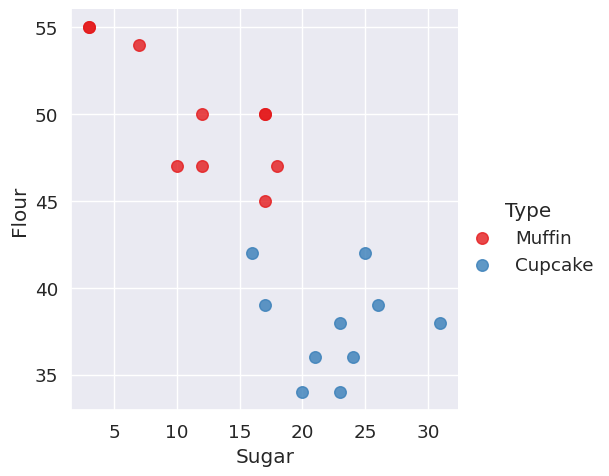

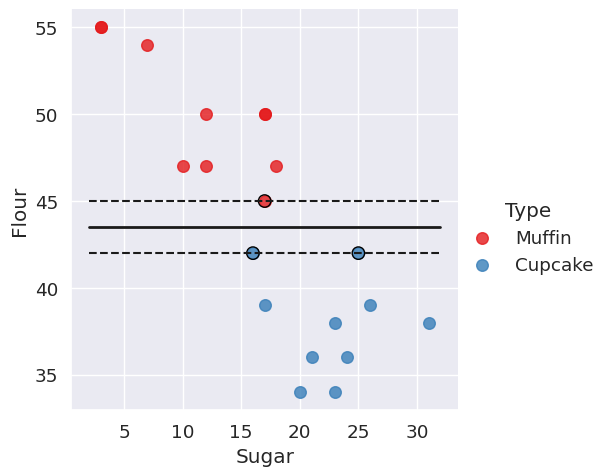

Predictions: [0 1 0 0]
Confusion Matrix:
 [[2 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [2]:
!pip install seaborn scikit-learn pandas numpy matplotlib --quiet

import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os

sns.set(font_scale=1.2)

if not os.path.exists("recipes_muffins_cupcakes.csv"):
    from google.colab import files
    print("Please upload your 'recipes_muffins_cupcakes.csv' file:")
    uploaded = files.upload()

recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
print(recipes.head())
print(recipes.shape)

sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

sugar_flour = recipes[['Sugar', 'Flour']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

model = svm.SVC(kernel='linear')
model.fit(sugar_flour, type_label)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(recipes['Sugar']) - 1, max(recipes['Sugar']) + 1)
yy = a * xx - (model.intercept_[0]) / w[1]

b_down = model.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])

b_up = model.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])

sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, 'k-', linewidth=2)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='black')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(sugar_flour, type_label, test_size=0.2, random_state=42)
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)
pred = model1.predict(x_test)

print("Predictions:", pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))


/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],
/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],
/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],
/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],
/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],
/tmp/ipython-input-4273356119.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],


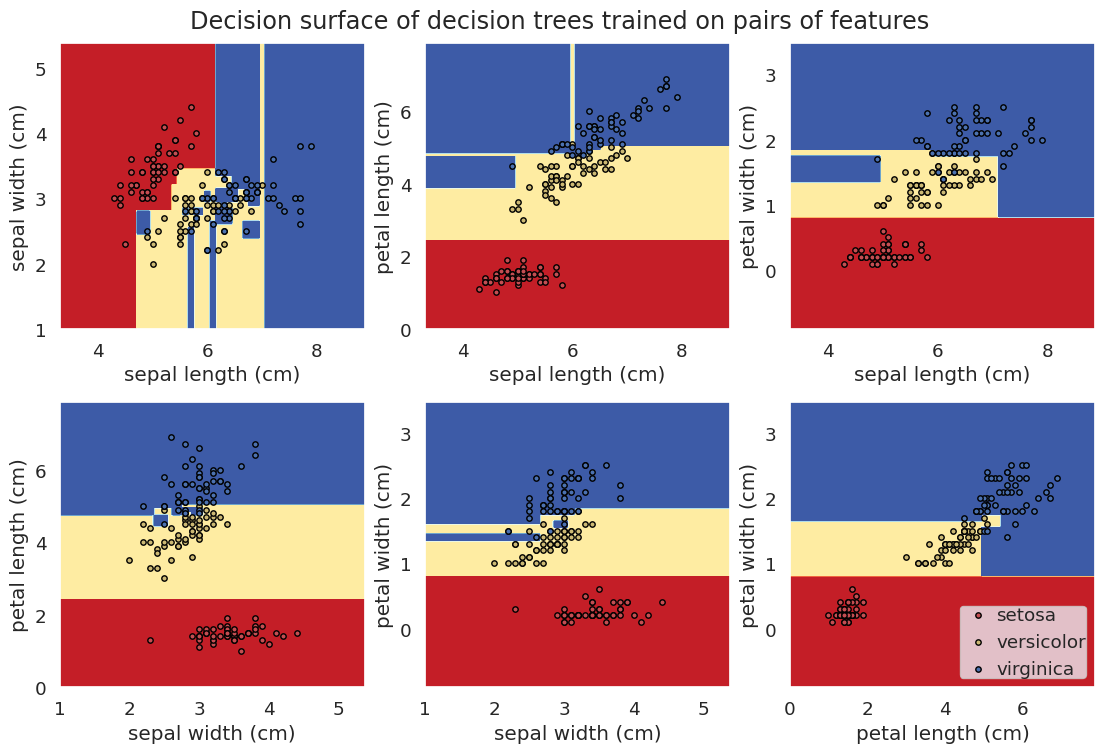

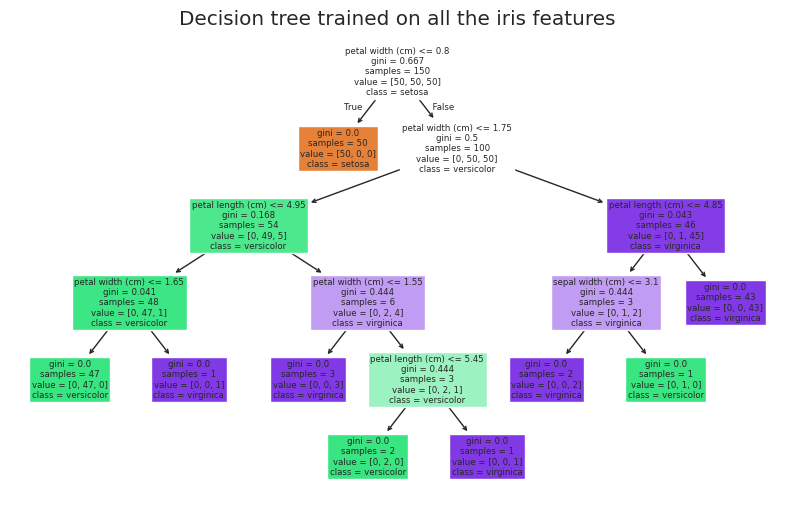

In [3]:
!pip install scikit-learn matplotlib numpy --quiet

from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor="black", s=15)

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

plt.figure(figsize=(10, 6))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision tree trained on all the iris features")
plt.show()


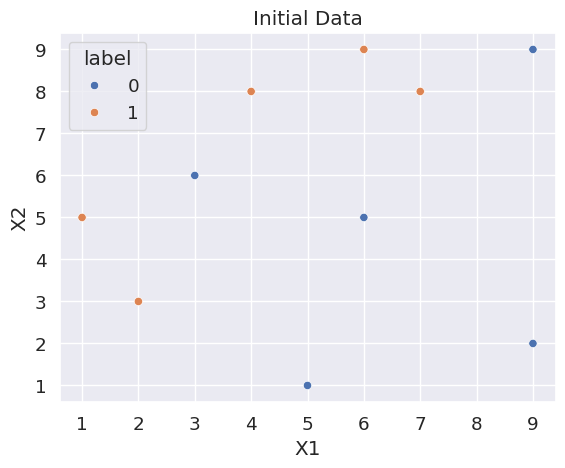

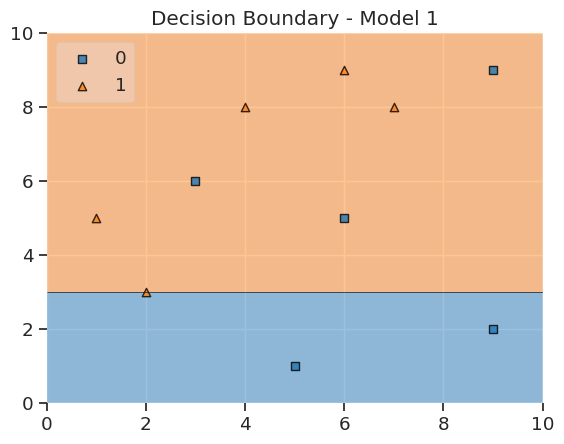

Alpha1 = 0.42364893019360184


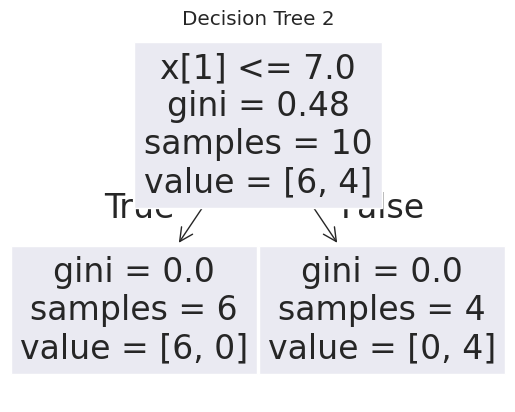

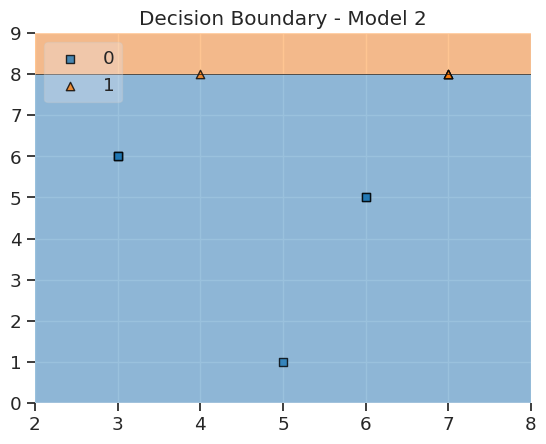

Alpha2 = 1.0986122886681098
Alpha3 = -0.4236489301936017
All Alphas: 0.42364893019360184 1.0986122886681098 -0.4236489301936017

Query (1,5):
dt1: [1]
dt2: [0]
Combined weighted vote: 1.0

Query (9,9):
dt1: [1]
dt2: [1]
Combined weighted vote: -1.0


In [5]:
!pip install mlxtend seaborn scikit-learn matplotlib pandas numpy --quiet

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.ioff()

df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
df['weights'] = 1 / df.shape[0]

sns.scatterplot(x='X1', y='X2', hue='label', data=df)
plt.title("Initial Data")
plt.show()
plt.close()

x = df[['X1', 'X2']].values
y = df['label'].values
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(x, y)

plot_decision_regions(x, y, clf=dt1, legend=2)
plt.title("Decision Boundary - Model 1")
plt.show()
plt.close()

df['y_pred'] = dt1.predict(x)

def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

alpha1 = calculate_model_weight(0.3)
print("Alpha1 =", alpha1)

def update_row_weights(row, alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, axis=1)
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

def create_new_dataset(df):
    indices = []
    for _ in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_lower'] < a <= row['cumsum_upper']:
                indices.append(index)
                break
    return indices

index_values = create_new_dataset(df)
second_df = df.iloc[index_values, [0, 1, 2, 3]].copy()

x2 = second_df[['X1', 'X2']].values
y2 = second_df['label'].values
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(x2, y2)

fig, ax = plt.subplots()
plot_tree(dt2, ax=ax)
plt.title("Decision Tree 2")
plt.show()
plt.close()

plot_decision_regions(x2, y2, clf=dt2, legend=2)
plt.title("Decision Boundary - Model 2")
plt.show()
plt.close()

second_df['y_pred'] = dt2.predict(x2)
alpha2 = calculate_model_weight(0.1)
print("Alpha2 =", alpha2)

def update_row_weights_2(row, alpha=alpha2):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights_2, axis=1)
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

alpha3 = calculate_model_weight(0.7)
print("Alpha3 =", alpha3)
print("All Alphas:", alpha1, alpha2, alpha3)

query1 = np.array([1, 5]).reshape(1, 2)
print("\nQuery (1,5):")
print("dt1:", dt1.predict(query1))
print("dt2:", dt2.predict(query1))
print("Combined weighted vote:", np.sign(alpha1 + alpha2 + alpha3))

query2 = np.array([9, 9]).reshape(1, 2)
print("\nQuery (9,9):")
print("dt1:", dt1.predict(query2))
print("dt2:", dt2.predict(query2))
print("Combined weighted vote:", np.sign(alpha1*(-1) + alpha2*(-1) + alpha3*(-1)))


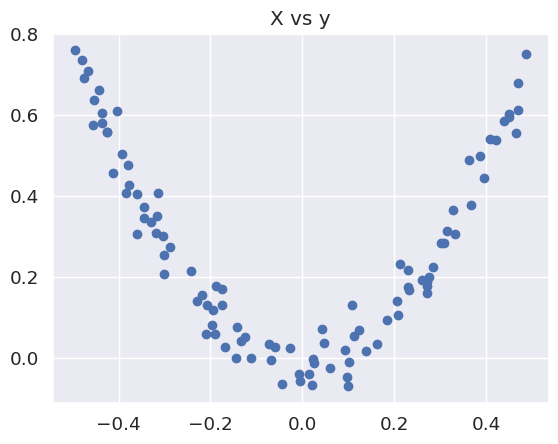

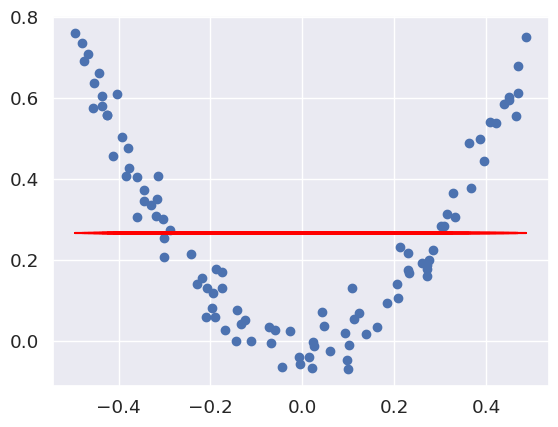

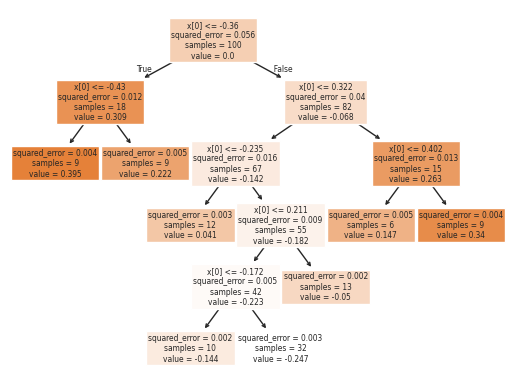

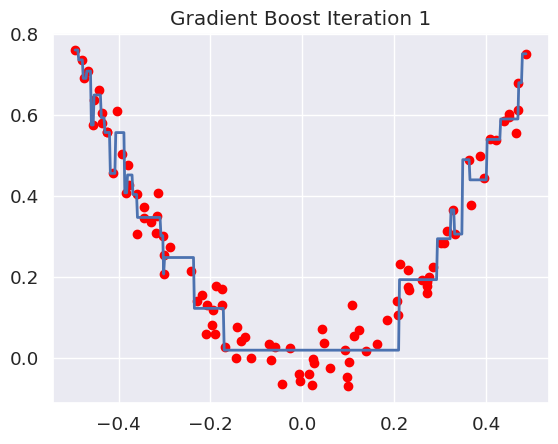

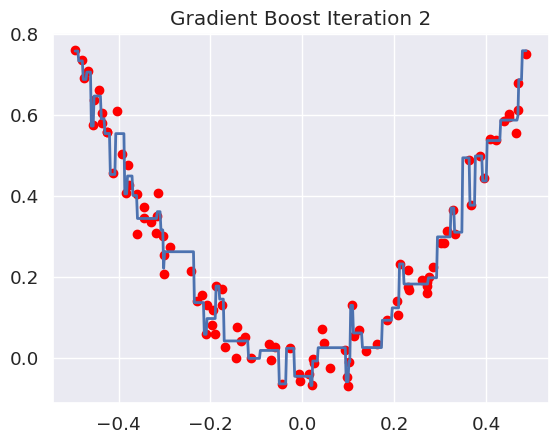

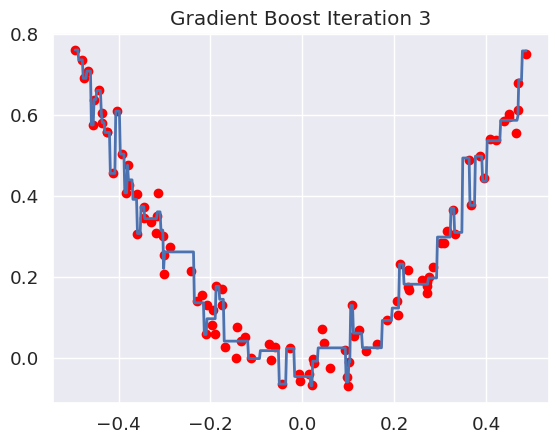

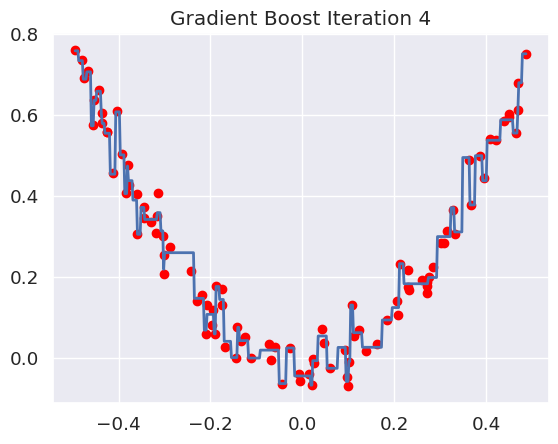

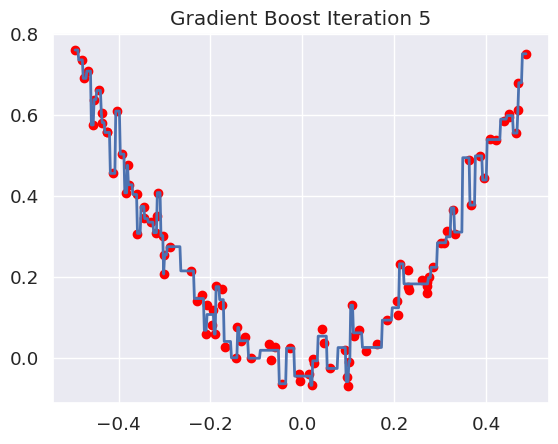

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

plt.scatter(df['X'], df['y'])
plt.title('X vs y')
plt.show()

df['pred1'] = df['y'].mean()
df['res1'] = df['y'] - df['pred1']

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.show()

tree1 = DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)
tree1.fit(df['X'].values.reshape(-1,1), df['res1'].values)

plt.figure()
plot_tree(tree1, filled=True)
plt.show()

df['pred2'] = df['pred1'] + tree1.predict(df['X'].values.reshape(-1,1))
df['res2'] = df['y'] - df['pred2']

def gradient_boost(X, y, number, lr, count=1, regs=[], foo=None):
    if number == 0:
        return
    else:
        if count > 1:
            y_current = y - sum(lr * reg.predict(X) for reg in regs)
        else:
            y_current = y
            foo = y_current
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y_current)
        regs.append(tree_reg)

        x1 = np.linspace(X.min(), X.max(), 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.scatter(X[:, 0], foo, color='red')
        plt.title(f'Gradient Boost Iteration {count}')
        plt.show()

        gradient_boost(X, y, number-1, lr, count+1, regs, foo=foo)

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

gradient_boost(X, y, number=5, lr=1)


Saving Mall_Customers.csv to Mall_Customers (1).csv
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


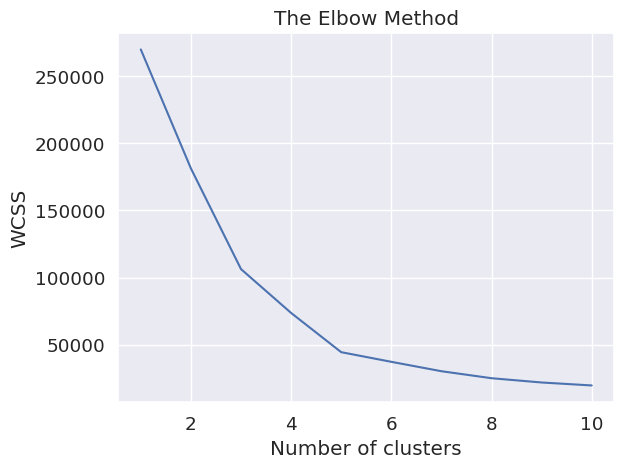

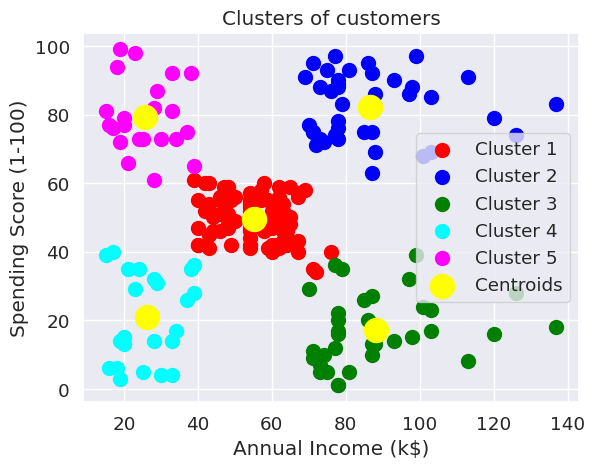

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values
print(dataset.head())

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [14]:
import numpy as np
import pandas as pd
from math import sqrt

from google.colab import files
uploaded = files.upload()

data = pd.read_csv("KNN (3).csv")
print(data.head(5))

req_data = data.iloc[:, 1:]
print(req_data.head(5))

shuffle_index = np.random.permutation(req_data.shape[0])
req_data = req_data.iloc[shuffle_index]
print(req_data.head(5))

train_size = int(req_data.shape[0] * 0.7)
train_df = req_data.iloc[:train_size, :]
test_df = req_data.iloc[train_size:, :]
train = train_df.values
test = test_df.values
y_true = test[:, 0] # 'diagnosis' column is now the first column after slicing req_data

print('Train_Shape: ', train_df.shape)
print('Test_Shape: ', test_df.shape)

def euclidean_distance(x_test, x_train):
    distance = 0
    # Calculate distance for all features
    for i in range(len(x_test)):
        distance += (x_test[i] - x_train[i]) ** 2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    # Separate features and labels in x_train
    x_train_features = x_train[:, 1:].astype(float)
    x_train_labels = x_train[:, 0]

    # Convert x_test features to float
    x_test_numeric = x_test[1:].astype(float)

    for i in range(x_train_features.shape[0]):
        distances.append(euclidean_distance(x_test_numeric, x_train_features[i]))

    distances = np.array(distances)
    sort_indexes = distances.argsort()

    # Get the neighbors from the original x_train array using sorted indices
    neighbors = x_train[sort_indexes][:num_neighbors]

    return neighbors

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[0]) # The diagnosis is the first column
    # Handle cases with no neighbors or empty classes list
    if not classes:
        return None # Or some other appropriate value
    predicted = max(classes, key=classes.count)
    return predicted

def accuracy_score(y_true, y_pred):
    num_correct = 0
    # Ensure y_true and y_pred are iterable and have the same length
    if len(y_true) != len(y_pred):
        return 0.0 # Or raise an error

    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            num_correct += 1
    return num_correct / len(y_true)

y_pred = []
for i in test:
    y_pred.append(prediction(i, train, 5))

print("Predictions:", y_pred)
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

Saving KNN (3).csv to KNN (3) (4).csv
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  p

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


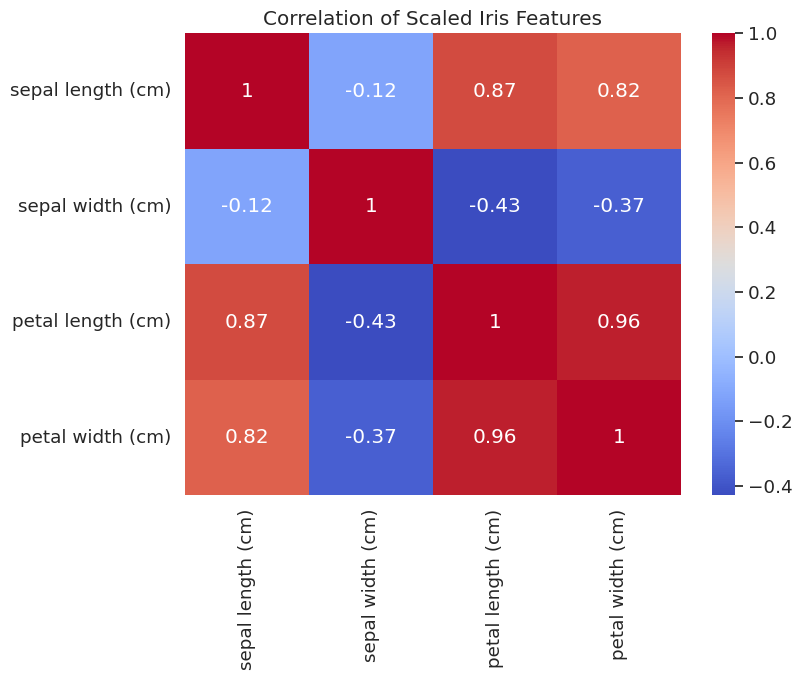

        PC1       PC2       PC3
0 -2.264703  0.480027  0.127706
1 -2.080961 -0.674134  0.234609
2 -2.364229 -0.341908 -0.044201
3 -2.299384 -0.597395 -0.091290
4 -2.389842  0.646835 -0.015738


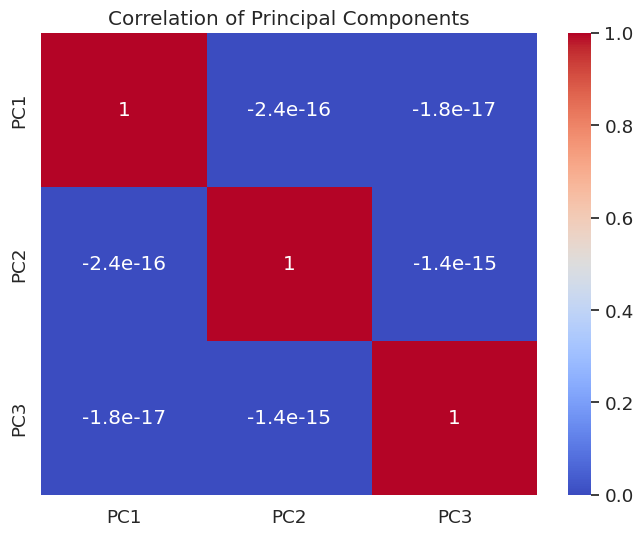

In [20]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(df.head())

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(scaled_data.head())

plt.figure(figsize=(8,6))
sns.heatmap(scaled_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Scaled Iris Features")
plt.show()

pca = PCA(n_components=3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
print(data_pca.head())

plt.figure(figsize=(8,6))
sns.heatmap(data_pca.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Principal Components")
plt.show()


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


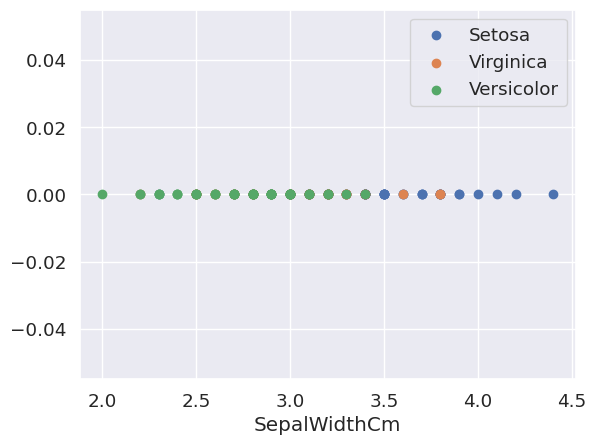

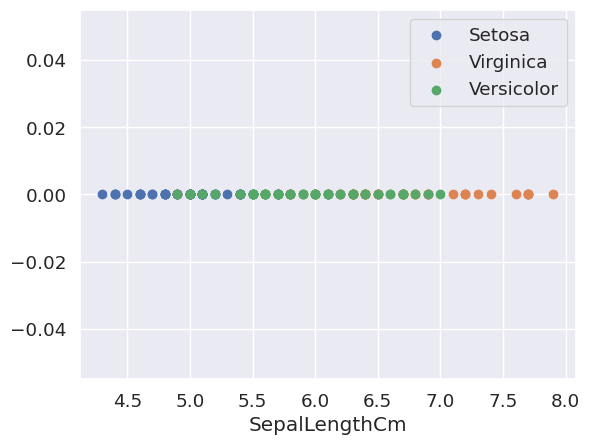

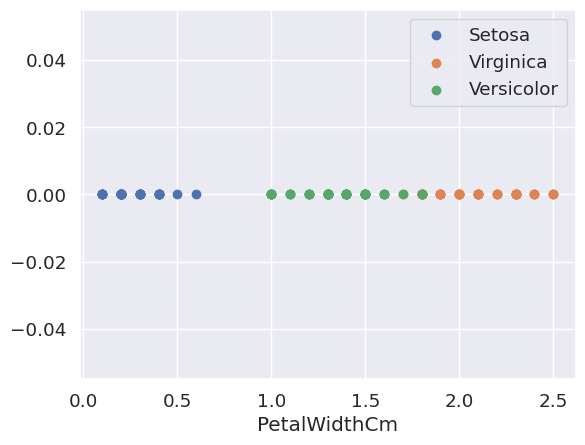

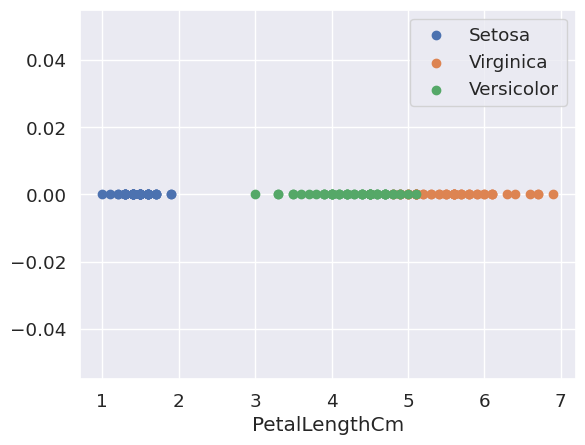

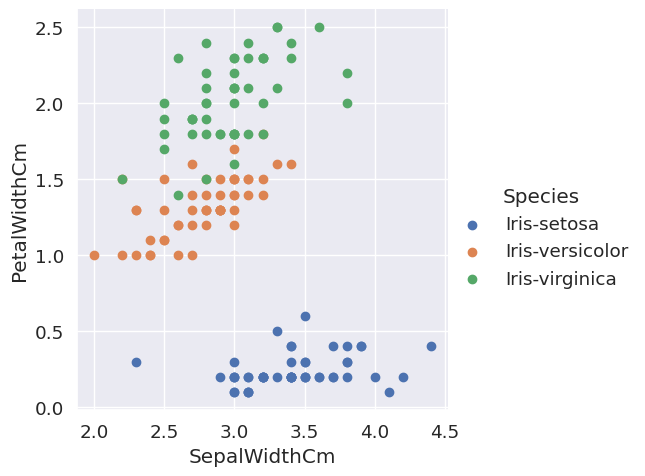

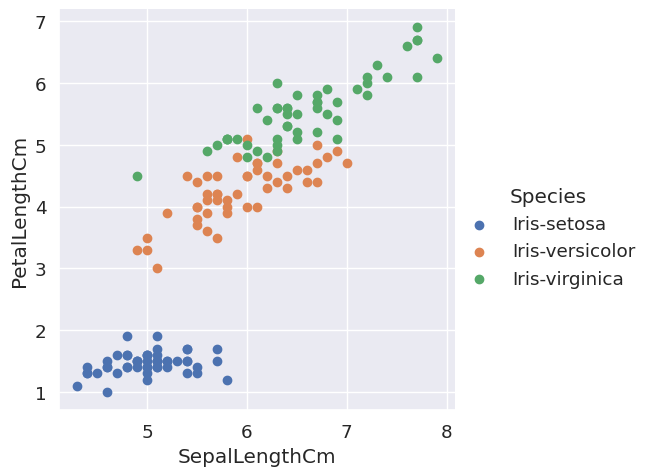

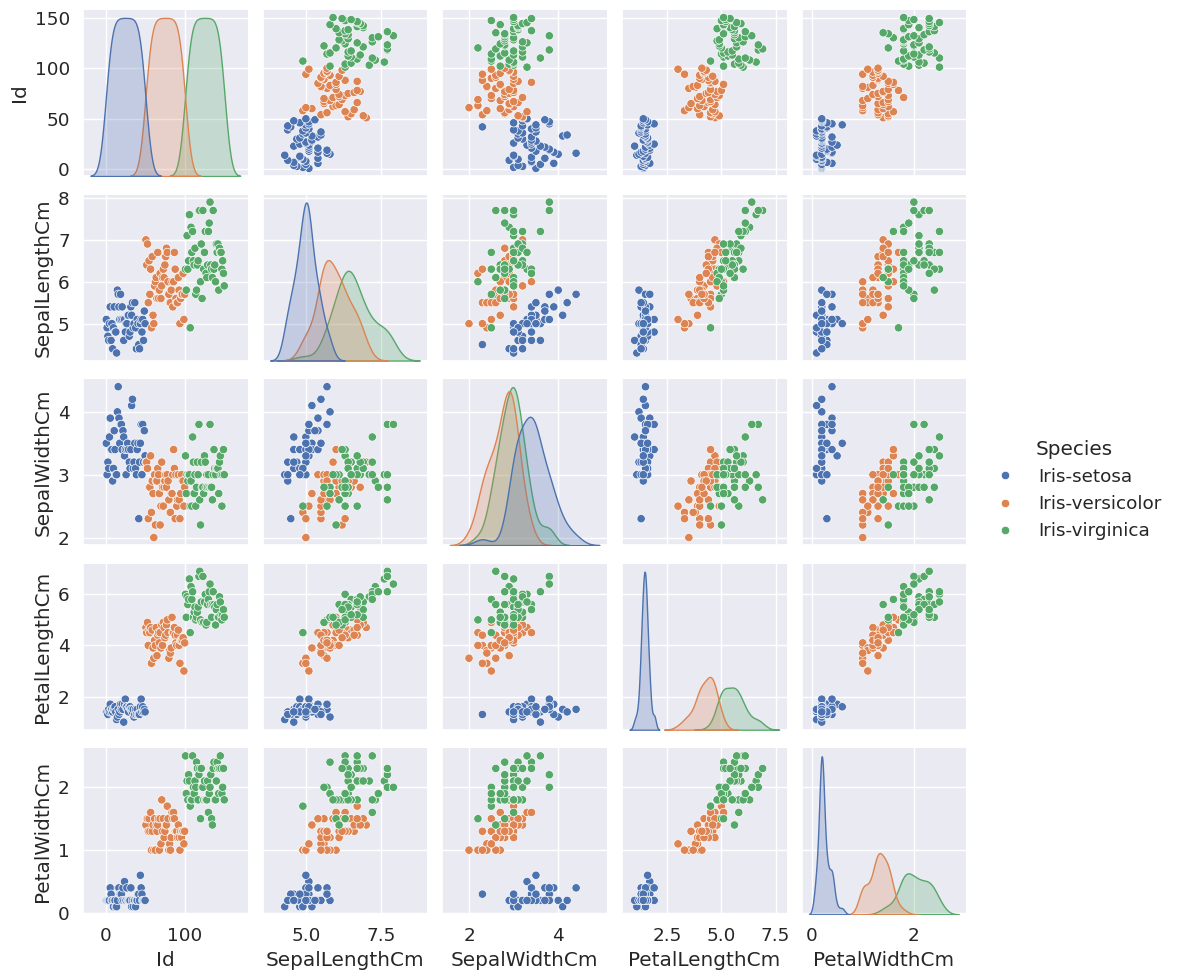

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/iris.csv')
print(df.head())
print(df.shape)

df_Setosa = df[df['Species'] == 'Iris-setosa']
df_Virginica = df[df['Species'] == 'Iris-virginica']
df_Versicolor = df[df['Species'] == 'Iris-versicolor']

plt.scatter(df_Setosa['SepalWidthCm'], np.zeros_like(df_Setosa['SepalWidthCm']), label='Setosa')
plt.scatter(df_Virginica['SepalWidthCm'], np.zeros_like(df_Virginica['SepalWidthCm']), label='Virginica')
plt.scatter(df_Versicolor['SepalWidthCm'], np.zeros_like(df_Versicolor['SepalWidthCm']), label='Versicolor')
plt.xlabel('SepalWidthCm')
plt.legend()
plt.show()

plt.scatter(df_Setosa['SepalLengthCm'], np.zeros_like(df_Setosa['SepalLengthCm']), label='Setosa')
plt.scatter(df_Virginica['SepalLengthCm'], np.zeros_like(df_Virginica['SepalLengthCm']), label='Virginica')
plt.scatter(df_Versicolor['SepalLengthCm'], np.zeros_like(df_Versicolor['SepalLengthCm']), label='Versicolor')
plt.xlabel('SepalLengthCm')
plt.legend()
plt.show()

plt.scatter(df_Setosa['PetalWidthCm'], np.zeros_like(df_Setosa['PetalWidthCm']), label='Setosa')
plt.scatter(df_Virginica['PetalWidthCm'], np.zeros_like(df_Virginica['PetalWidthCm']), label='Virginica')
plt.scatter(df_Versicolor['PetalWidthCm'], np.zeros_like(df_Versicolor['PetalWidthCm']), label='Versicolor')
plt.xlabel('PetalWidthCm')
plt.legend()
plt.show()

plt.scatter(df_Setosa['PetalLengthCm'], np.zeros_like(df_Setosa['PetalLengthCm']), label='Setosa')
plt.scatter(df_Virginica['PetalLengthCm'], np.zeros_like(df_Virginica['PetalLengthCm']), label='Virginica')
plt.scatter(df_Versicolor['PetalLengthCm'], np.zeros_like(df_Versicolor['PetalLengthCm']), label='Versicolor')
plt.xlabel('PetalLengthCm')
plt.legend()
plt.show()

sns.FacetGrid(df, hue='Species', height=5).map(plt.scatter, "SepalWidthCm", "PetalWidthCm").add_legend()
plt.show()

sns.FacetGrid(df, hue='Species', height=5).map(plt.scatter, "SepalLengthCm", "PetalLengthCm").add_legend()
plt.show()

sns.pairplot(df, hue="Species", height=2)
plt.show()
